In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('dataset.csv')

# STEP 1: The Setup (Loading and Inspecting the Data)

In [3]:
df.head(20)

,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates
0,Aachen,1,Valid,L5,"Quantity[21, ""Grams""]",Fell,"DateObject[{1880}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{50.775, 6.08333}]"
1,Aarhus,2,Valid,H6,"Quantity[720, ""Grams""]",Fell,"DateObject[{1951}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{56.18333, 10.23333}]"
2,Abee,6,Valid,EH4,"Quantity[107000, ""Grams""]",Fell,"DateObject[{1952}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{54.21667, -113.}]"
3,Acapulco,10,Valid,Acapulcoite,"Quantity[1914, ""Grams""]",Fell,"DateObject[{1976}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{16.88333, -99.9}]"
4,Achiras,370,Valid,L6,"Quantity[780, ""Grams""]",Fell,"DateObject[{1902}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{-33.16667, -64.95}]"
5,Adhi Kot,379,Valid,EH4,"Quantity[4239, ""Grams""]",Fell,"DateObject[{1919}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{32.1, 71.8}]"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,"Quantity[910, ""Grams""]",Fell,"DateObject[{1949}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{44.83333, 95.16667}]"
7,Agen,392,Valid,H5,"Quantity[30000, ""Grams""]",Fell,"DateObject[{1814}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{44.21667, 0.61667}]"
8,Aguada,398,Valid,L6,"Quantity[1620, ""Grams""]",Fell,"DateObject[{1930}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{-31.6, -65.23333}]"
9,Aguila Blanca,417,Valid,L,"Quantity[1440, ""Grams""]",Fell,"DateObject[{1920}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{-30.86667, -64.55}]"


In [4]:
df.shape

(45716, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            45716 non-null  object
 1   ID              45716 non-null  int64 
 2   NameType        45716 non-null  object
 3   Classification  45716 non-null  object
 4   Mass            45716 non-null  object
 5   Fall            45716 non-null  object
 6   Year            45716 non-null  object
 7   Coordinates     45716 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.8+ MB


In [6]:
# there are no NaNs or Null columns
df[['Mass','Year','Coordinates']].describe()

,Mass,Year,Coordinates
count,45716,45716,45716
unique,12577,265,17100
top,"Quantity[1.3, ""Grams""]","DateObject[{2003}, ""Year"", ""Gregorian"", -5.]","Missing[""NotAvailable""]"
freq,171,3323,13529


In [7]:
'''
12577 Unique values of Mass
265 Unique Years
17100 Unique Coordinates
'''
df['Coordinates'][0]

'GeoPosition[{50.775, 6.08333}]'

# STEP 2: The Cleanup Crew (Data Cleaning and Preparation)

**Columns such as: Mass,Coordinates and Year are not in proper format so we need to extract the necessary values from them**

In [8]:
def latitude_longitude(coord):
    if isinstance(coord, str) and 'GeoPosition' in coord:
        coord = coord.replace('GeoPosition[{', '')
        coord = coord.replace('}]', '')
        lat, lon = coord.split(',')
        return float(lat), float(lon)
    else:
        return np.nan, np.nan

df[['lat', 'lon']] = df['Coordinates'].apply(lambda x: pd.Series(latitude_longitude(x)))

In [9]:
# dropping the coordinates column
df = df.drop(['Coordinates'],axis=1)

In [10]:
df.columns

Index(['Name', 'ID', 'NameType', 'Classification', 'Mass', 'Fall', 'Year',
       'lat', 'lon'],
      dtype='object')

In [11]:
df.head(10)

,Name,ID,NameType,Classification,Mass,Fall,Year,lat,lon
0,Aachen,1,Valid,L5,"Quantity[21, ""Grams""]",Fell,"DateObject[{1880}, ""Year"", ""Gregorian"", -5.]",50.77500,6.08333
1,Aarhus,2,Valid,H6,"Quantity[720, ""Grams""]",Fell,"DateObject[{1951}, ""Year"", ""Gregorian"", -5.]",56.18333,10.23333
2,Abee,6,Valid,EH4,"Quantity[107000, ""Grams""]",Fell,"DateObject[{1952}, ""Year"", ""Gregorian"", -5.]",54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,"Quantity[1914, ""Grams""]",Fell,"DateObject[{1976}, ""Year"", ""Gregorian"", -5.]",16.88333,-99.90000
4,Achiras,370,Valid,L6,"Quantity[780, ""Grams""]",Fell,"DateObject[{1902}, ""Year"", ""Gregorian"", -5.]",-33.16667,-64.95000
5,Adhi Kot,379,Valid,EH4,"Quantity[4239, ""Grams""]",Fell,"DateObject[{1919}, ""Year"", ""Gregorian"", -5.]",32.10000,71.80000
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,"Quantity[910, ""Grams""]",Fell,"DateObject[{1949}, ""Year"", ""Gregorian"", -5.]",44.83333,95.16667
7,Agen,392,Valid,H5,"Quantity[30000, ""Grams""]",Fell,"DateObject[{1814}, ""Year"", ""Gregorian"", -5.]",44.21667,0.61667
8,Aguada,398,Valid,L6,"Quantity[1620, ""Grams""]",Fell,"DateObject[{1930}, ""Year"", ""Gregorian"", -5.]",-31.60000,-65.23333
9,Aguila Blanca,417,Valid,L,"Quantity[1440, ""Grams""]",Fell,"DateObject[{1920}, ""Year"", ""Gregorian"", -5.]",-30.86667,-64.55000


In [12]:
'''
from the Year column:
Year: in which year the meteroite fell
Offset (-5.): Time Zone UTC - 5 hrs
only these data is required...because only these vary in the dataset other fields like Year and Gregorian are same for every entry. 
'''
# extracting(creating new column) for Year and Time zone
def extract_year_time_zone(entry):
    if isinstance(entry, str) and 'DateObject' in entry:
        to_remove = ['DateObject[{', '}', ']', '"Year"', '"Gregorian"']
        for i in to_remove:
            entry = entry.replace(i, '')
        parts = entry.split(',')
        year = parts[0].strip()
        timezone = parts[-1].strip().replace('.', '') 
        return int(year), int(timezone)
    else:
        return np.nan, np.nan

df[['year', 'time_zone']] = df['Year'].apply(lambda x: pd.Series(extract_year_time_zone(x)))

In [13]:
df = df.drop(['Year'],axis=1)

In [14]:
df.head(10)

,Name,ID,NameType,Classification,Mass,Fall,lat,lon,year,time_zone
0,Aachen,1,Valid,L5,"Quantity[21, ""Grams""]",Fell,50.77500,6.08333,1880.0,-5.0
1,Aarhus,2,Valid,H6,"Quantity[720, ""Grams""]",Fell,56.18333,10.23333,1951.0,-5.0
2,Abee,6,Valid,EH4,"Quantity[107000, ""Grams""]",Fell,54.21667,-113.00000,1952.0,-5.0
3,Acapulco,10,Valid,Acapulcoite,"Quantity[1914, ""Grams""]",Fell,16.88333,-99.90000,1976.0,-5.0
4,Achiras,370,Valid,L6,"Quantity[780, ""Grams""]",Fell,-33.16667,-64.95000,1902.0,-5.0
5,Adhi Kot,379,Valid,EH4,"Quantity[4239, ""Grams""]",Fell,32.10000,71.80000,1919.0,-5.0
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,"Quantity[910, ""Grams""]",Fell,44.83333,95.16667,1949.0,-5.0
7,Agen,392,Valid,H5,"Quantity[30000, ""Grams""]",Fell,44.21667,0.61667,1814.0,-5.0
8,Aguada,398,Valid,L6,"Quantity[1620, ""Grams""]",Fell,-31.60000,-65.23333,1930.0,-5.0
9,Aguila Blanca,417,Valid,L,"Quantity[1440, ""Grams""]",Fell,-30.86667,-64.55000,1920.0,-5.0


In [15]:
'''
Now, for the Mass column again Unit is same throughout so we just need to extract the numerical value
'''
# extracting numerical value of Mass
def extract_quantity(entry):
    if isinstance(entry, str) and 'Quantity' in entry:
        # Remove unnecessary parts
        to_remove = ['Quantity[', ']', '"']
        for i in to_remove:
            entry = entry.replace(i, '')
        
        # Split into value and unit
        parts = entry.split(',')
        value = parts[0].strip()
        unit = parts[1].strip()
        return float(value), unit
    else:
        return np.nan, np.nan

df[['mass', 'unit']] = df['Mass'].apply(lambda x: pd.Series(extract_quantity(x)))

In [16]:
df.head(10)

,Name,ID,NameType,Classification,Mass,Fall,lat,lon,year,time_zone,mass,unit
0,Aachen,1,Valid,L5,"Quantity[21, ""Grams""]",Fell,50.77500,6.08333,1880.0,-5.0,21.0,Grams
1,Aarhus,2,Valid,H6,"Quantity[720, ""Grams""]",Fell,56.18333,10.23333,1951.0,-5.0,720.0,Grams
2,Abee,6,Valid,EH4,"Quantity[107000, ""Grams""]",Fell,54.21667,-113.00000,1952.0,-5.0,107000.0,Grams
3,Acapulco,10,Valid,Acapulcoite,"Quantity[1914, ""Grams""]",Fell,16.88333,-99.90000,1976.0,-5.0,1914.0,Grams
4,Achiras,370,Valid,L6,"Quantity[780, ""Grams""]",Fell,-33.16667,-64.95000,1902.0,-5.0,780.0,Grams
5,Adhi Kot,379,Valid,EH4,"Quantity[4239, ""Grams""]",Fell,32.10000,71.80000,1919.0,-5.0,4239.0,Grams
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,"Quantity[910, ""Grams""]",Fell,44.83333,95.16667,1949.0,-5.0,910.0,Grams
7,Agen,392,Valid,H5,"Quantity[30000, ""Grams""]",Fell,44.21667,0.61667,1814.0,-5.0,30000.0,Grams
8,Aguada,398,Valid,L6,"Quantity[1620, ""Grams""]",Fell,-31.60000,-65.23333,1930.0,-5.0,1620.0,Grams
9,Aguila Blanca,417,Valid,L,"Quantity[1440, ""Grams""]",Fell,-30.86667,-64.55000,1920.0,-5.0,1440.0,Grams


In [17]:
df['unit'].nunique()

1

In [18]:
# all the units are in gram hence we actuallly don't need unit column and Mass column
# dropping Mass and unit columns
df = df.drop(['Mass','unit'],axis=1)

In [19]:
df.head(10)

,Name,ID,NameType,Classification,Fall,lat,lon,year,time_zone,mass
0,Aachen,1,Valid,L5,Fell,50.77500,6.08333,1880.0,-5.0,21.0
1,Aarhus,2,Valid,H6,Fell,56.18333,10.23333,1951.0,-5.0,720.0
2,Abee,6,Valid,EH4,Fell,54.21667,-113.00000,1952.0,-5.0,107000.0
3,Acapulco,10,Valid,Acapulcoite,Fell,16.88333,-99.90000,1976.0,-5.0,1914.0
4,Achiras,370,Valid,L6,Fell,-33.16667,-64.95000,1902.0,-5.0,780.0
5,Adhi Kot,379,Valid,EH4,Fell,32.10000,71.80000,1919.0,-5.0,4239.0
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,Fell,44.83333,95.16667,1949.0,-5.0,910.0
7,Agen,392,Valid,H5,Fell,44.21667,0.61667,1814.0,-5.0,30000.0
8,Aguada,398,Valid,L6,Fell,-31.60000,-65.23333,1930.0,-5.0,1620.0
9,Aguila Blanca,417,Valid,L,Fell,-30.86667,-64.55000,1920.0,-5.0,1440.0


# STEP 3: The Detective Work (Analysis and Insights)

**TOP 10 HEAVIEST METEORITES**

In [46]:
top_10_heaviest_meteorites = df.nlargest(10, 'mass')[['Name', 'Classification', 'mass','lat','lon']].reset_index(drop=True)

In [47]:
top_10_heaviest_meteorites

,Name,Classification,mass,lat,lon
0,Hope,"Iron, IVB",60000000.0,-19.58333,17.91667
1,Catalina 011,"Iron, IIIAB",58200000.0,76.13333,-64.93333
2,Catalina 003,"Iron, IAB-MG",50000000.0,-27.46667,-60.58333
3,Catalina 008,"Iron, IAB-MG",30000000.0,35.05000,-111.03333
4,Asuka 8602,"Iron, IIIE",28000000.0,47.00000,88.00000
5,Glorieta Mountain,"Iron, IVA",26000000.0,-25.50000,18.00000
6,Colorado Springs,"Iron, IIIAB",24300000.0,27.00000,-105.10000
7,Mundrabilla 005,"Iron, IAB-ung",24000000.0,-30.78333,127.55000
8,Sinai,"Iron, IIAB",23000000.0,46.16000,134.65333
9,Bates Nunataks A78005,"Iron, ungrouped",22000000.0,26.20000,-107.83333


In [22]:
# heaviest Type(Classification)
heaviest_classification = df.groupby("Classification", as_index=False)['mass'].mean()
heaviest_classification.sort_values(by='mass',ascending=False).head(10)

,Classification,mass
236,"Iron, IVB",4.322833e+06
231,"Iron, IIIE",2.076114e+06
206,"Iron, IAB-MG",1.301547e+06
216,"Iron, IC",8.925563e+05
416,Mesosiderite-A1,6.982063e+05
214,"Iron, IAB-ung",6.860050e+05
434,"Pallasite, PMG-an",6.853589e+05
228,"Iron, IIIAB",4.888059e+05
234,"Iron, IVA",4.635455e+05
237,"Iron, ungrouped",4.221594e+05


In [23]:
# Count of Fell vs Found
fall_count = df['Fall'].value_counts()
fall_count

Fall
Found    44609
Fell      1107
Name: count, dtype: int64

In [24]:
common_classes = df['Classification'].value_counts().head(5)
common_classes

Classification
L6    8285
H5    7142
L5    4796
H6    4528
H4    4211
Name: count, dtype: int64

In [25]:
# most common ones are L6,H5,L5,H6,H4
avg_mass_common_classes = (df[df['Classification'].isin(common_classes.index)].groupby('Classification')['mass'].mean().sort_values(ascending=False))
avg_mass_common_classes

Classification
H5    2166.091410
L5    1797.351703
L6    1450.444284
H4     997.419550
H6     862.366988
Name: mass, dtype: float64

In [26]:
# decade wise trend analysis
df = df.dropna(subset=['year']) 
df['decade'] = (df['year']//10)*10

In [27]:
df.head(5)

,Name,ID,NameType,Classification,Fall,lat,lon,year,time_zone,mass,decade
0,Aachen,1,Valid,L5,Fell,50.77500,6.08333,1880.0,-5.0,21.0,1880.0
1,Aarhus,2,Valid,H6,Fell,56.18333,10.23333,1951.0,-5.0,720.0,1950.0
2,Abee,6,Valid,EH4,Fell,54.21667,-113.00000,1952.0,-5.0,107000.0,1950.0
3,Acapulco,10,Valid,Acapulcoite,Fell,16.88333,-99.90000,1976.0,-5.0,1914.0,1970.0
4,Achiras,370,Valid,L6,Fell,-33.16667,-64.95000,1902.0,-5.0,780.0,1900.0


In [28]:
decade_trends = df.groupby('decade').size().reset_index(name='count')
decade_trends

,decade,count
0,860.0,1
1,920.0,1
2,1390.0,1
3,1490.0,3
4,1510.0,1
5,1570.0,1
6,1580.0,1
7,1600.0,1
8,1620.0,3
9,1630.0,3


In [29]:
# converting the mass columns to mass_kg
df['mass_kg'] = df['mass']/1000
df.head(5)

,Name,ID,NameType,Classification,Fall,lat,lon,year,time_zone,mass,decade,mass_kg
0,Aachen,1,Valid,L5,Fell,50.77500,6.08333,1880.0,-5.0,21.0,1880.0,0.021
1,Aarhus,2,Valid,H6,Fell,56.18333,10.23333,1951.0,-5.0,720.0,1950.0,0.720
2,Abee,6,Valid,EH4,Fell,54.21667,-113.00000,1952.0,-5.0,107000.0,1950.0,107.000
3,Acapulco,10,Valid,Acapulcoite,Fell,16.88333,-99.90000,1976.0,-5.0,1914.0,1970.0,1.914
4,Achiras,370,Valid,L6,Fell,-33.16667,-64.95000,1902.0,-5.0,780.0,1900.0,0.780


In [30]:
mass_array = df['mass_kg'].dropna().to_numpy()
# calculating mean using np.mean()
mean_mass = np.mean(mass_array)
# calculating median using np.median()
median_mass = np.median(mass_array)
# calculating standard deviation using np.std()
std_mass = np.std(mass_array)
sum_mass = np.sum(mass_array)
max_mass = np.max(mass_array)

print(f"Mean mass: {mean_mass:.2f} kg")
print(f"Median mass: {median_mass:.2f} kg")
print(f"Standard Deviation: {std_mass:.2f} kg")
print(f"Total Mass: {sum_mass:.2f} kg")
print(f"Maximum Mass: {max_mass:.2f} kg")

Mean mass: 13.32 kg
Median mass: 0.03 kg
Standard Deviation: 576.72 kg
Total Mass: 603301.06 kg
Maximum Mass: 60000.00 kg


# STEP 4: Tell the Story (Visualization)

**Count of “Fell” vs “Found” Meteorites**

C:\Users\archit vaishnav\AppData\Local\Temp\ipykernel_11148\4099333984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(data=df, x='Fall', palette='coolwarm')


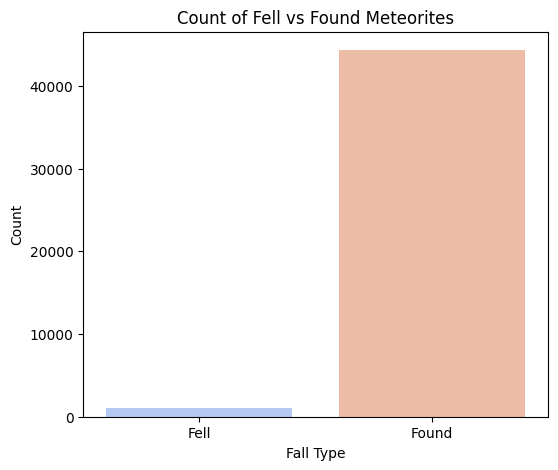

In [31]:
plt.figure(figsize=(6,5))
sn.countplot(data=df, x='Fall', palette='coolwarm')
plt.title('Count of Fell vs Found Meteorites')
plt.xlabel('Fall Type')
plt.ylabel('Count')
plt.show()

**DECADE WISE METEORITE FALL**

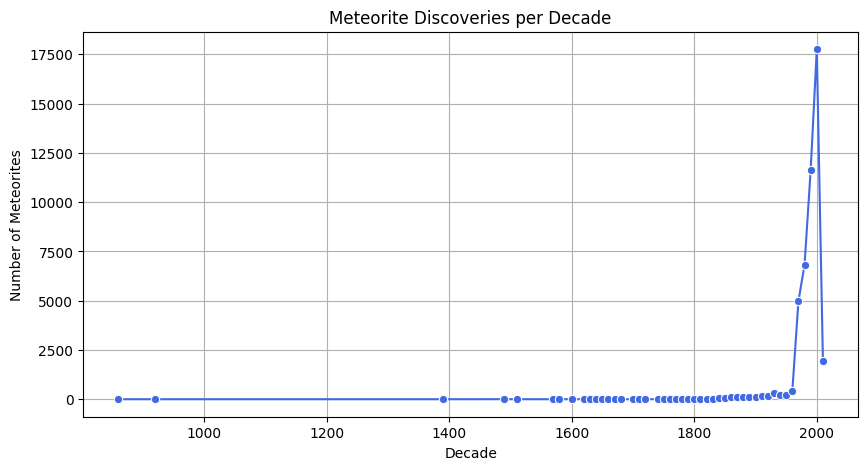

In [32]:
plt.figure(figsize=(10,5))
sn.lineplot(data=decade_trends, x='decade', y='count', marker='o', color='royalblue')
plt.title('Meteorite Discoveries per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Meteorites')
plt.grid(True)
plt.show()

**Average Mass by Classification (Top 10)**

C:\Users\archit vaishnav\AppData\Local\Temp\ipykernel_11148\3780878536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=top10_class, y='Classification', x='mass_kg', palette='magma')


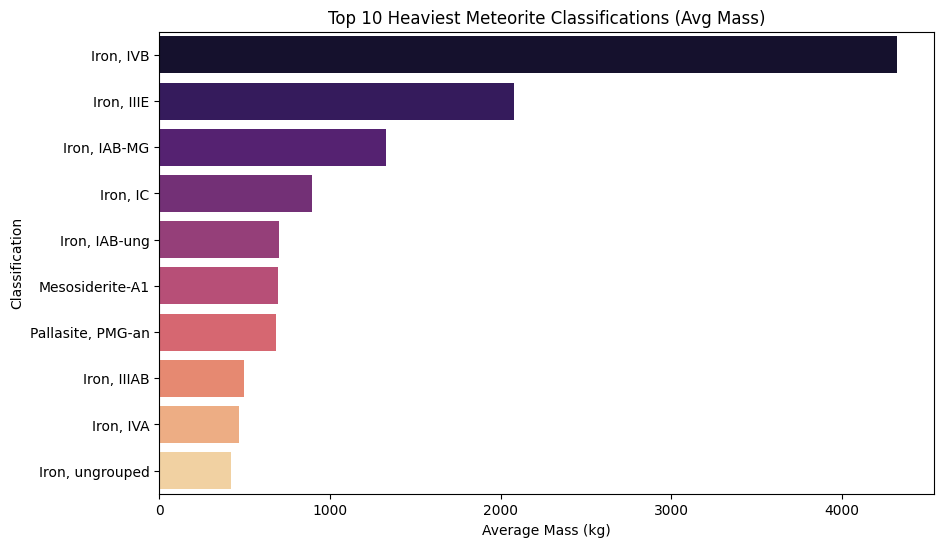

In [33]:
top10_class = (df.groupby('Classification')['mass_kg'].mean().sort_values(ascending=False).head(10).reset_index())
plt.figure(figsize=(10,6))
sn.barplot(data=top10_class, y='Classification', x='mass_kg', palette='magma')
plt.title('Top 10 Heaviest Meteorite Classifications (Avg Mass)')
plt.xlabel('Average Mass (kg)')
plt.ylabel('Classification')
plt.show()

**Geographic Distribution (Scatter Plot)**

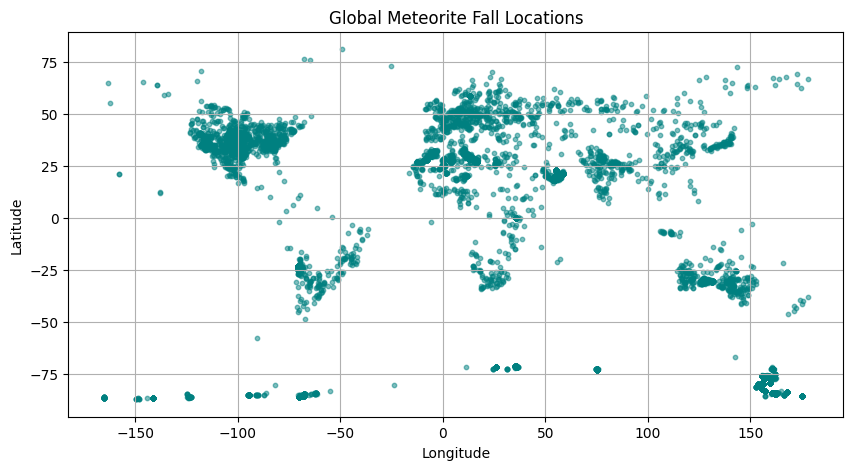

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(df['lon'], df['lat'], s=10, alpha=0.5, color='teal')
plt.title('Global Meteorite Fall Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Interactive Geospatial Mapping

In [35]:
!pip install folium


   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]



In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45424 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            45424 non-null  object 
 1   ID              45424 non-null  int64  
 2   NameType        45424 non-null  object 
 3   Classification  45424 non-null  object 
 4   Fall            45424 non-null  object 
 5   lat             32037 non-null  float64
 6   lon             32037 non-null  float64
 7   year            45424 non-null  float64
 8   time_zone       45424 non-null  float64
 9   mass            45309 non-null  float64
 10  decade          45424 non-null  float64
 11  mass_kg         45309 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 4.5+ MB


In [76]:
top_100_heaviest_meteorites = df.nlargest(50, 'mass')[['Name', 'Classification', 'mass','lat','lon']].reset_index(drop=True)
top_100_heaviest_meteorites = top_100_heaviest_meteorites.dropna()

In [77]:
# plotting top_10_heaviest_meteorites
names = list(top_100_heaviest_meteorites['Name'])
lat = list(top_100_heaviest_meteorites['lat'])
lon = list(top_100_heaviest_meteorites['lon'])

In [78]:
import folium

map = folium.Map(location=[39.8283,-98.5795],zoom_start=2)
for i in range(0,len(lat)):
    coord = (lat[i],lon[i])
    folium.Marker(coord,popup=names[i]).add_to(map)
map

In [79]:
# clustered map
from folium.plugins import FastMarkerCluster
map = map = folium.Map(location=[39.8283,-98.5795],zoom_start=4)
FastMarkerCluster(data=list(zip(lat,lon))).add_to(map)
map

# Conclusion

## After Exploratory Data Analysis on the given dataset following conclusions can be drawn  
1. The raw dataset inlcuded 45716 rows with 8 columns: `df.shape`
2. The `Coordinates, Mass and Year` were not usual python objects instead there were `GeoPosition[{50.775, 6.08333}]`,`Quantity[21, "Grams"]` and `DateObject[{1880}, "Year", "Gregorian", -5.]` respectively.
3. So, using string manipulation and list comprehension proper data format for Coordinates, Mass and Year are extracted.
4. New columns added were `year`,`lat`,`lon`,`mass`. Where `lat and lon` represent latitude and longitude, the `mass` was given in grams which was later changed to kg as per the requirements.
5. Top 10 heaviest Meteorites inlcuded:
   
   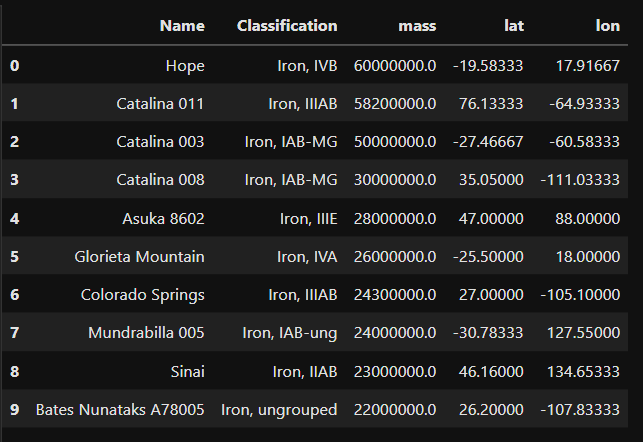

   
7. Most heavy type of meteorite is `Iron, IVB`.
8. From the analysis it is found that more meteorites are `founded` than they `fell`.
9. Meteorites discovery per decade shows that majority of the meteroites were dicovered in 2000s followed by 1990s and 1980s respectively.
10. Maximum mass of the meteorite is `60000.00 kg` and the mean mass is `13.2 kg`
11. From the plotted map it is evident that majority of the meteorites are found in North American Subcontinent paritculary in USA.
    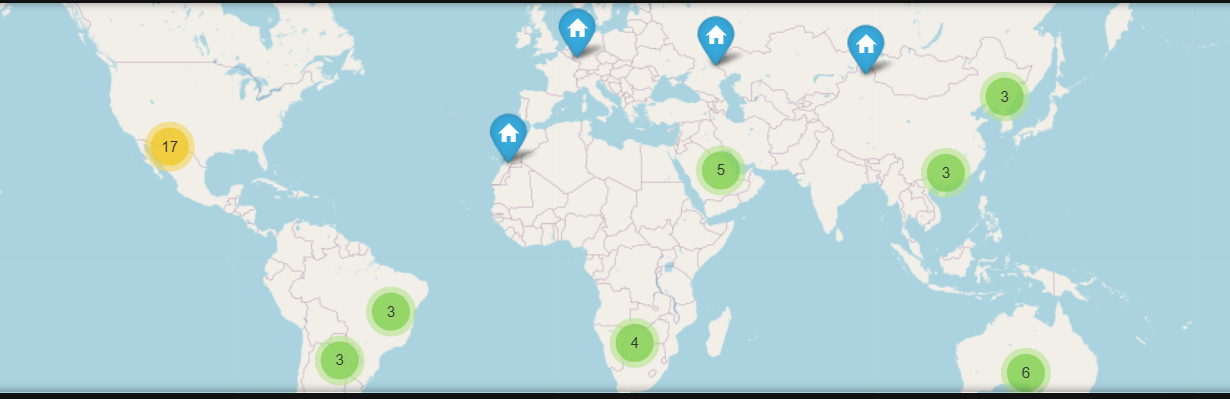
    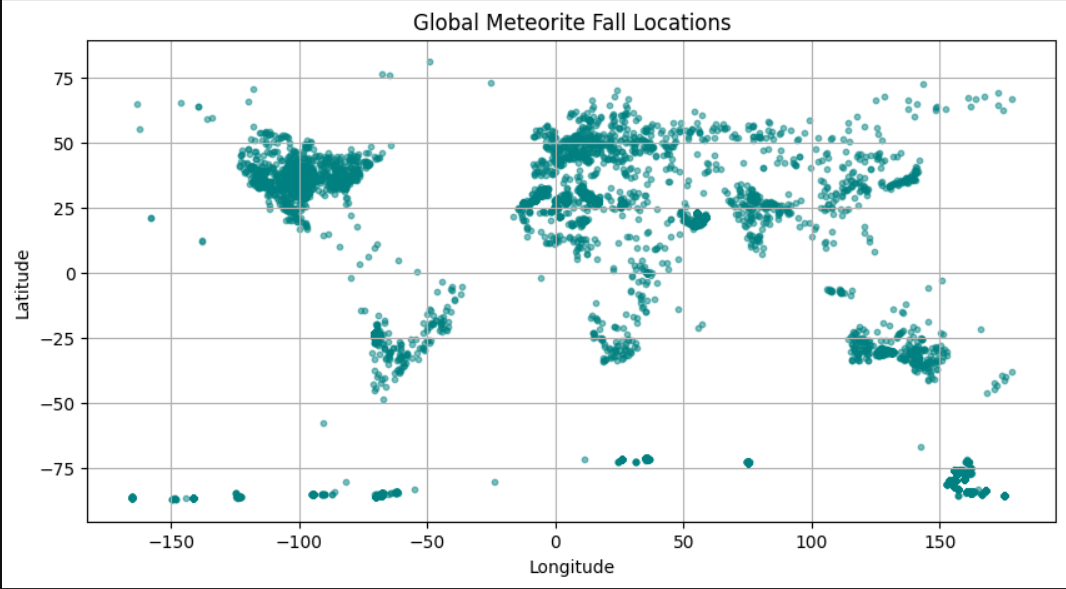